In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#importing all the necessary libraries as follows



    numpy (imported as np) is a popular library in Python for working with arrays and performing numerical operations.

    pandas (imported as pd) is a library used for data manipulation and analysis.

    random is a Python module used for generating random numbers and values.

    matplotlib is a plotting library in Python used for visualizing data. pyplot is a module within matplotlib used for creating plots and charts. image is a module within matplotlib used for working with images in various formats.

    tensorflow is a popular deep learning framework used for building and training machine learning models. keras is a high-level API for building and training models in TensorFlow.

    layers is a module within keras used for constructing layers in a neural network. math is a module within tensorflow used for performing mathematical operations.

    plot_model is a method within keras.utils.vis_utils used for generating a visual representation of a Keras model.

    Sequential is a class within keras.models used for constructing sequential models in Keras.

    Conv2D, MaxPool2D, Flatten, Dense, and Activation are all classes within keras.layers used for constructing various layers in a neural network.

    to_categorical is a function within keras.utils.np_utils used for converting numerical labels to one-hot encoded labels.

    ImageDataGenerator is a class within tensorflow.keras.preprocessing.image used for generating batches of image data with data augmentation.

    train_test_split is a function within sklearn.model_selection used for splitting data into training and testing sets.

    make_column_transformer is a function within sklearn.compose used for chaining together multiple transformers to preprocess data.

    MinMaxScaler and OneHotEncoder are transformers within sklearn.preprocessing used for scaling continuous features and encoding categorical features, respectively.

    pathlib is a module in Python used for working with paths and files.

    os is a module in Python used for interacting with the operating system.

    zipfile is a module in Python used for working with .zip files.

In [2]:
import numpy as np 
import pandas as pd 
import random 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math 
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pathlib
import os
import zipfile 

##Data we are using has 2 classes(binary classification) and each class more than 3000 images.
##it's divided into train, test and val set with 80:10:5 ratio respectively  
##saved the data on google drive and now importing it on colab to use the data

##visualize the dataset and gain insights

In [3]:
def display_random_image(dir, class_type):
  img_dir = dir + "/" + class_type
  files = os.listdir(img_dir)
  img_name = random.choice(files)
  img = mpimg.imread(img_dir + '/' + img_name)
  plt.imshow(img)
  plt.title(class_type)
  plt.axis('off')
  print(f'image shape: {img.shape}')

image shape: (560, 952)


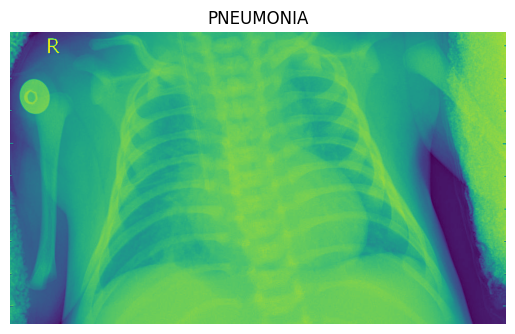

In [4]:
display_random_image('/content/drive/MyDrive/x_ray dataset upload/train', 'PNEUMONIA')

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Random rotation between 0 and 20 degrees
    width_shift_range=0.1,   # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1,  # Randomly shift images vertically by up to 10%
    zoom_range=0.1,          # Randomly zoom in on images by up to 10%
    horizontal_flip=True,    # Randomly flip images horizontally
    rescale=1./255           # Rescale the pixel values to [0, 1]
)

# Define the batch size and image dimensions
batch_size = 32
img_height = 224
img_width = 224

# Define the directory where the images are stored
train_dir = '/content/drive/MyDrive/x_ray dataset upload/train'
test_dir = '/content/drive/MyDrive/x_ray dataset upload/test'
val_dir = '/content/drive/MyDrive/x_ray dataset upload/val'

# Create a data generator for the training set
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode='binary'
)
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size =(img_height, img_width),
    batch_size = batch_size,
    class_mode= 'binary'
)

#This code defines an ImageDataGenerator object from TensorFlow's Keras API and uses it to generate batches of augmented image data from a directory. 
#The defined data augmentation operations include random rotations, horizontal and vertical shifting, zooming, and flipping. The pixel values are also rescaled to a range of [0,1].

#The datagen.flow_from_directory() method is used to generate batches of images from a directory with the specified height and width dimensions and with binary class labels. 
#The generated batches are used as input data for a deep learning model in a subsequent step.

#The train_dir, test_dir, and val_dir variables specify the directories where the training, testing, and validation datasets are located.

#The batch_size variable specifies the batch size to use for training the model.

#Overall, this code is preparing the image data for use in a deep learning model.
# By using data augmentation, the deep learning model will be more effective at generalizing to new data and avoiding overfitting.


Found 5243 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


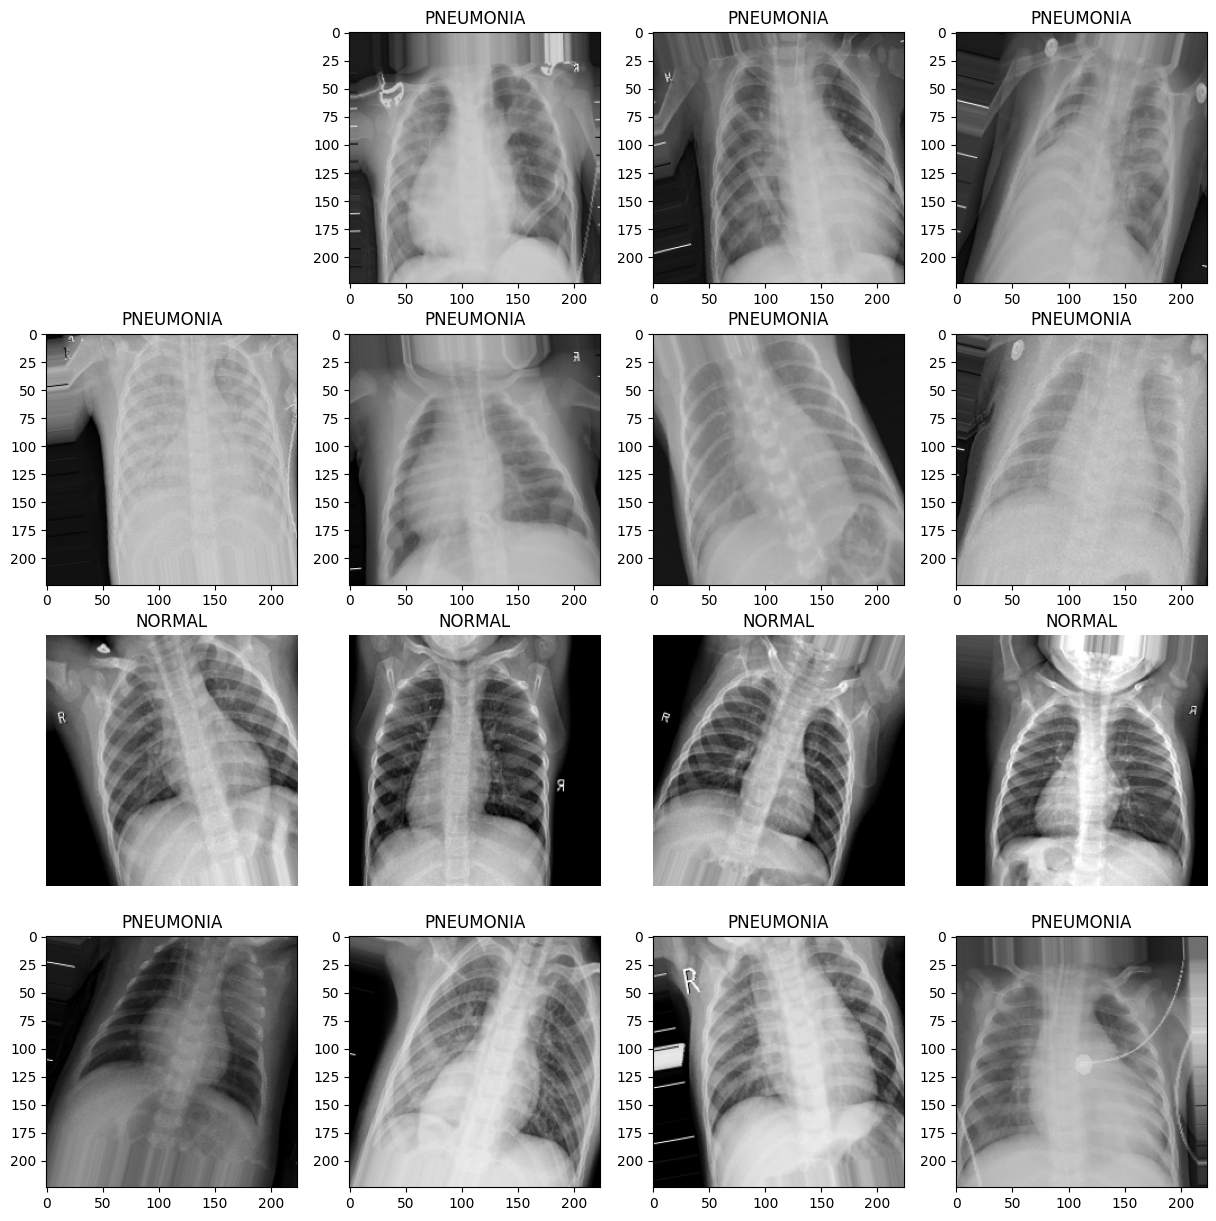

In [6]:
image_batch, label_batch = next(iter(train_generator))

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(15, 15))
  for n in range(15):
    ax = plt.subplot(4, 4, n + 2)
    plt.imshow(image_batch[n])
    if label_batch[n]:
      plt.title('PNEUMONIA')
    else:
      plt.title('NORMAL')
      plt.axis('off')

show_batch(image_batch, label_batch)

#The code image_batch, label_batch = next(iter(train_generator)) is used to get the next batch of training data from the train_generator.
# The train_generator is an ImageDataGenerator object which generates batches of image data from a directory,
# with specified height and width dimensions, batch size, and class labels.

#The returned image_batch is a numpy array containing a batch of images, while the label_batch is a numpy array containing the corresponding labels.
# This image_batch and label_batch are then passed to the show_batch() function to visualize the image data.

#The show_batch() function takes image_batch and label_batch as input and uses matplotlib to display a 4x4 grid of images in a single figure,
# with corresponding labels. In this code, for each image in the batch, if the corresponding label indicates pneumonia the image is labeled as "PNEUMONIA" 
#and if it indicates normal the image is labeled as "NORMAL".

#Transfer learning

Transfer learning is a machine learning technique where a pre-trained model is used as the starting point for a new model on a related task

. The idea is to leverage the knowledge and learned features from the existing pre-trained model to accelerate the learning process and improve the performance of the new model.

In transfer learning, the pre-trained model is often trained on a large dataset, such as ImageNet for image recognition tasks, and has learned a set of hierarchical features that can be useful for many other tasks. By using transfer learning, the new model can leverage these low-level features learned from the pre-trained model and use them as a starting point for learning new high-level features specific to the new task.


In [7]:
from keras.layers import concatenate
from keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D, Flatten,Conv2D, Dense,BatchNormalization,GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
input_shape = (224,224,3)
input_layer = Input(shape = (224, 224, 3))

#first model
mobilenet_base = MobileNetV2(weights = 'imagenet',input_shape = input_shape,include_top = False)

densenet_base = DenseNet169(weights = 'imagenet', input_shape = input_shape,include_top = False)

for layer in mobilenet_base.layers:
    layer.trainable =  False
for layer in densenet_base.layers:
    layer.trainable = False
    
model_mobilenet = mobilenet_base(input_layer)
model_mobilenet = GlobalAveragePooling2D()(model_mobilenet)
output_mobilenet = Flatten()(model_mobilenet)

model_densenet = densenet_base(input_layer)
model_densenet = GlobalAveragePooling2D()(model_densenet)
output_densenet = Flatten()(model_densenet)

merged = tf.keras.layers.Concatenate()([output_mobilenet, output_densenet])

x = BatchNormalization()(merged)
x = Dense(256,activation = 'relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(128,activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation = 'sigmoid')(x)
stacked_model = tf.keras.models.Model(inputs = input_layer, outputs = x)

#the above code defines a stacked model architecture in Keras for the task of detecting pneumonia in X-ray images. 
#The model uses two pre-trained convolutional neural networks, MobileNetV2 and DenseNet169, 
#as base models and concatenates their outputs along the last dimension. 
#This concatenated output is then fed through two fully connected layers with batch normalization and dropout for regularization.
# Finally, a single sigmoid output layer is used to classify the image as having pneumonia or not.

#Here is a summary of the layers of the stacked model:

    #Input layer with shape (224, 224, 3)

    #Two base models, MobileNetV2 and DenseNet169, with their layers set to non-trainable

    #GlobalAveragePooling2D layer on top of each base model to reduce spatial dimensions

    #Flatten layer on top of each base model to flatten the output into a single dimension vector

    #Concatenate layer to concatenate the flattened outputs of the two base models along the last dimension

    #Two Dense layers with 256 and 128 units, respectively, with batch normalization and dropout in between

    #Output sigmoid layer with a single unit for binary classification

#This stacked model architecture is a common transfer learning approach for deep learning problems where pre-trained models are used for different tasks. 
#The architecture allows the model to use the previously learned feature representations from the two pre-trained models to classify X-ray images for pneumonia detection.

51877672/51877672 [==============================] - 2s 0us/step


In [8]:
optm = Adam(learning_rate=0.0001)
stacked_model.compile(loss='binary_crossentropy', optimizer=optm, 
                  metrics=['accuracy'])

#The optm = Adam(learning_rate=0.0001) line in this code defines an instance of the Adam optimizer with a learning rate of 0.0001. 
#The Adam optimizer is a popular optimization algorithm used in deep learning, 
#that uses the momentum concept to escape local minima and converged to a global minimum faster.

#The compile method in stacked_model is used to compile the model for a specific optimization method,
# specifying the loss function and metric(s) to optimize the model. In this case, the loss function is set to 'binary_crossentropy',
# which is commonly used for binary classification problems, and the optimizer argument is set to the Adam optimizer instance defined by optm.
# Lastly, metrics are used to evaluate the performance of the model. In this case, 'accuracy' is the metric used to measure the accuracy of model predictions.

In [11]:
stacked_history = stacked_model.fit(train_generator,
                              steps_per_epoch = len(train_generator),
                              epochs = 12,
                              validation_data = test_generator)

#The code stacked_history = stacked_model.fit(train_generator, steps_per_epoch = len(train_generator), 
#epochs = 20, validation_data = test_generator) trains the stacked model defined earlier on a dataset of X-ray images with labels for pneumonia and normal cases. 
#The fit() method of the stacked_model object is called with the following arguments:

    #train_generator: a generator object that yields batches of training data, which is used as the training data for the model fitting.

    #steps_per_epoch: the number of batches of training data to be fed to the model per epoch.

    #epochs: the number of times the training dataset is passed through the model during training.

    #validation_data: a generator object that yields batches of validation data, which is used to evaluate the performance of the model during training.

#After training the model, the fit() method returns a History object,
# which contains information about the training process such as the values of the specified metrics and the loss function over epochs.
# This History object is assigned to stacked_history

Epoch 1/12
164/164 [==============================] - 201s 1s/step - loss: 0.2360 - accuracy: 0.9073 - val_loss: 0.3186 - val_accuracy: 0.8590
Epoch 2/12
164/164 [==============================] - 149s 909ms/step - loss: 0.1724 - accuracy: 0.9348 - val_loss: 0.3533 - val_accuracy: 0.8446
Epoch 3/12
164/164 [==============================] - 148s 904ms/step - loss: 0.1639 - accuracy: 0.9361 - val_loss: 0.3566 - val_accuracy: 0.8622
Epoch 4/12
164/164 [==============================] - 148s 905ms/step - loss: 0.1499 - accuracy: 0.9407 - val_loss: 0.4219 - val_accuracy: 0.8478
Epoch 5/12
164/164 [==============================] - 148s 904ms/step - loss: 0.1276 - accuracy: 0.9483 - val_loss: 0.3752 - val_accuracy: 0.8638
Epoch 6/12
164/164 [==============================] - 153s 934ms/step - loss: 0.1256 - accuracy: 0.9519 - val_loss: 0.4108 - val_accuracy: 0.8542
Epoch 7/12
164/164 [==============================] - 147s 898ms/step - loss: 0.1212 - accuracy: 0.9548 - val_loss: 0.4386 - va

<Axes: >

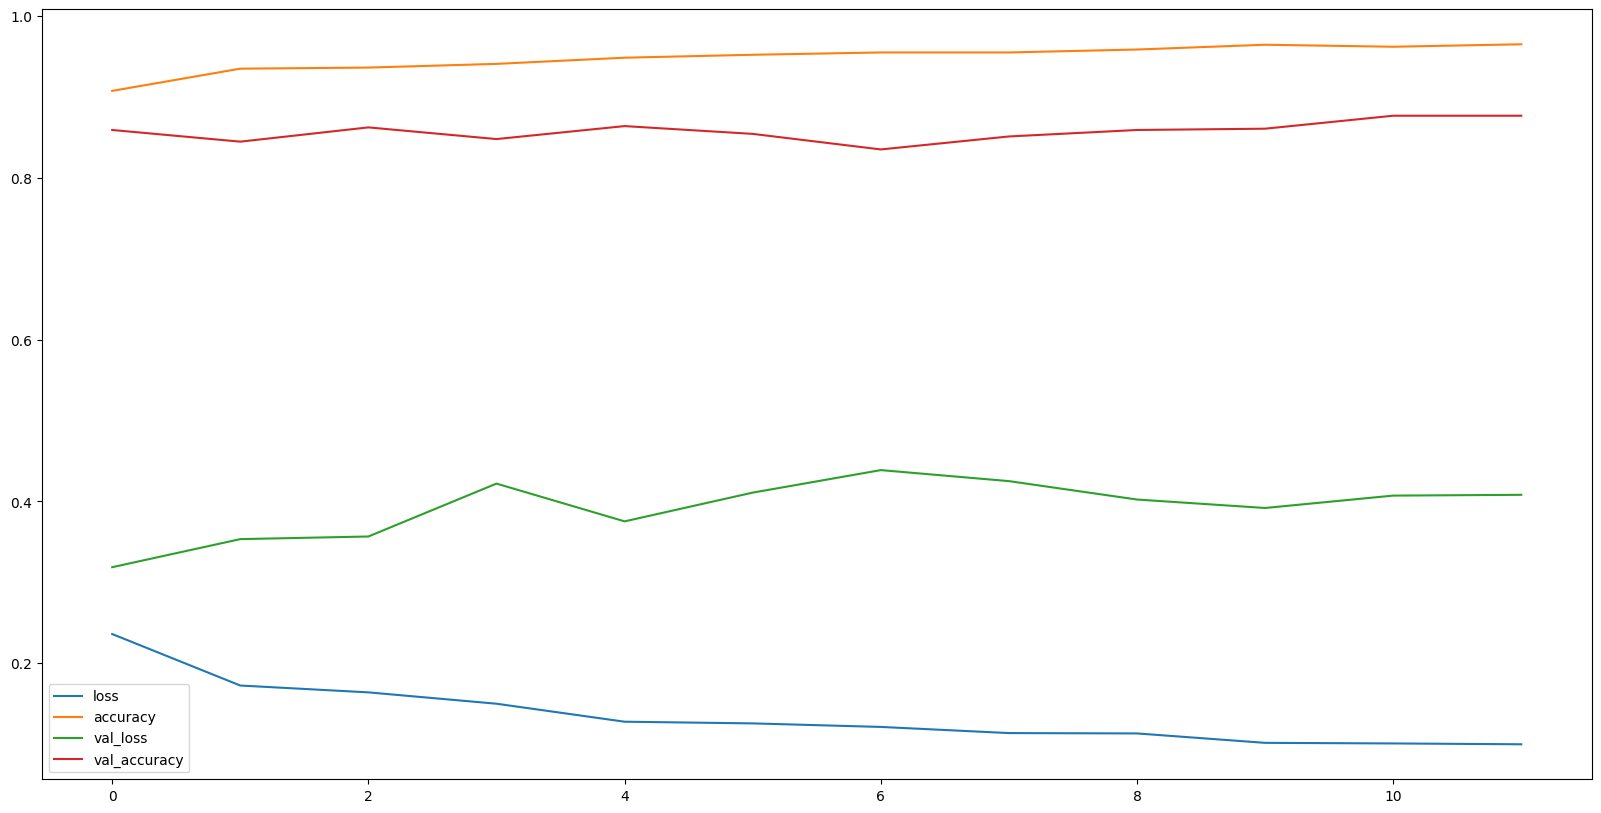

In [12]:
pd.DataFrame(stacked_history.history).plot(figsize=(20,10))

In [13]:
from joblib import dump, load
dump(stacked_model, 'X_ray_classification_model.joblib')

['X_ray_classification_model.joblib']